In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Instagram.csv", encoding = 'latin1')

In [4]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
df.isna().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


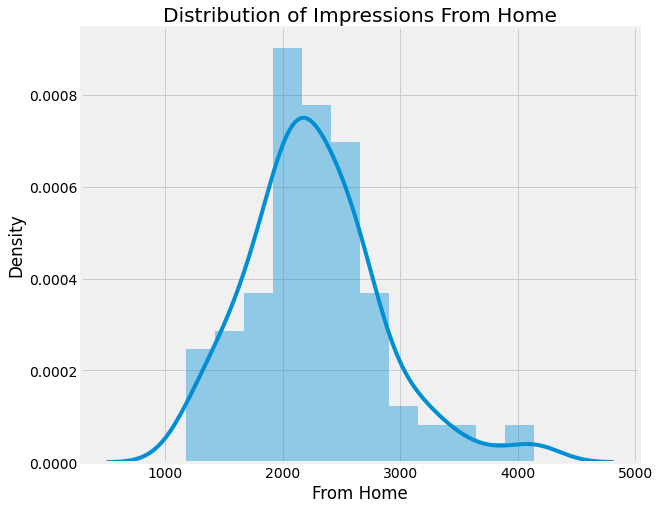

In [8]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(df['From Home'])
plt.show()

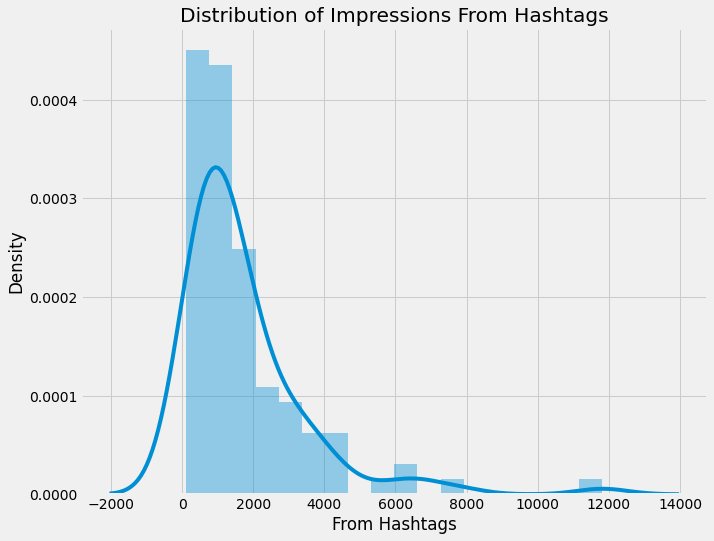

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()

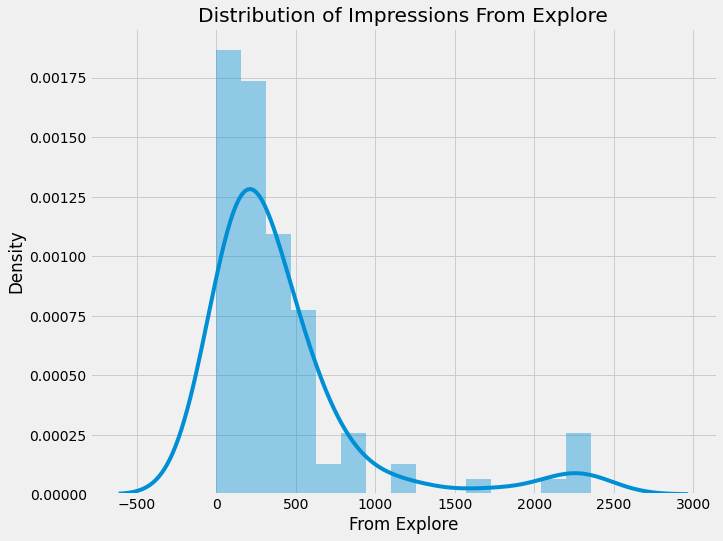

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(df['From Explore'])
plt.show()

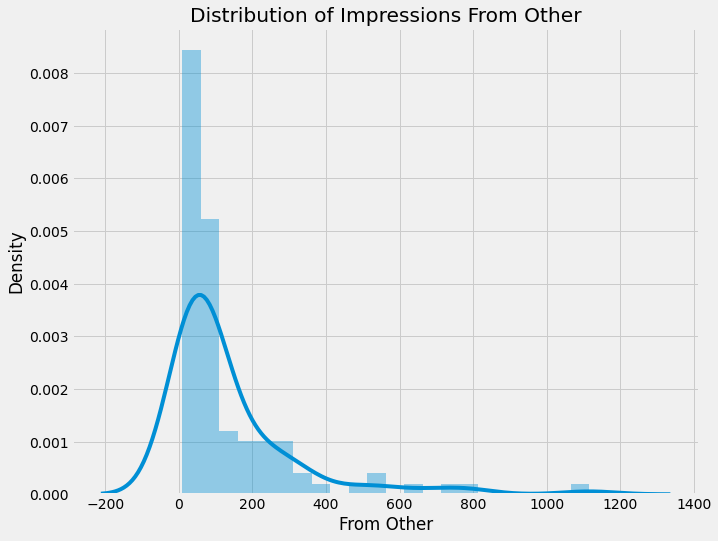

In [11]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Other")
sns.distplot(df['From Other'])
plt.show()

In [12]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

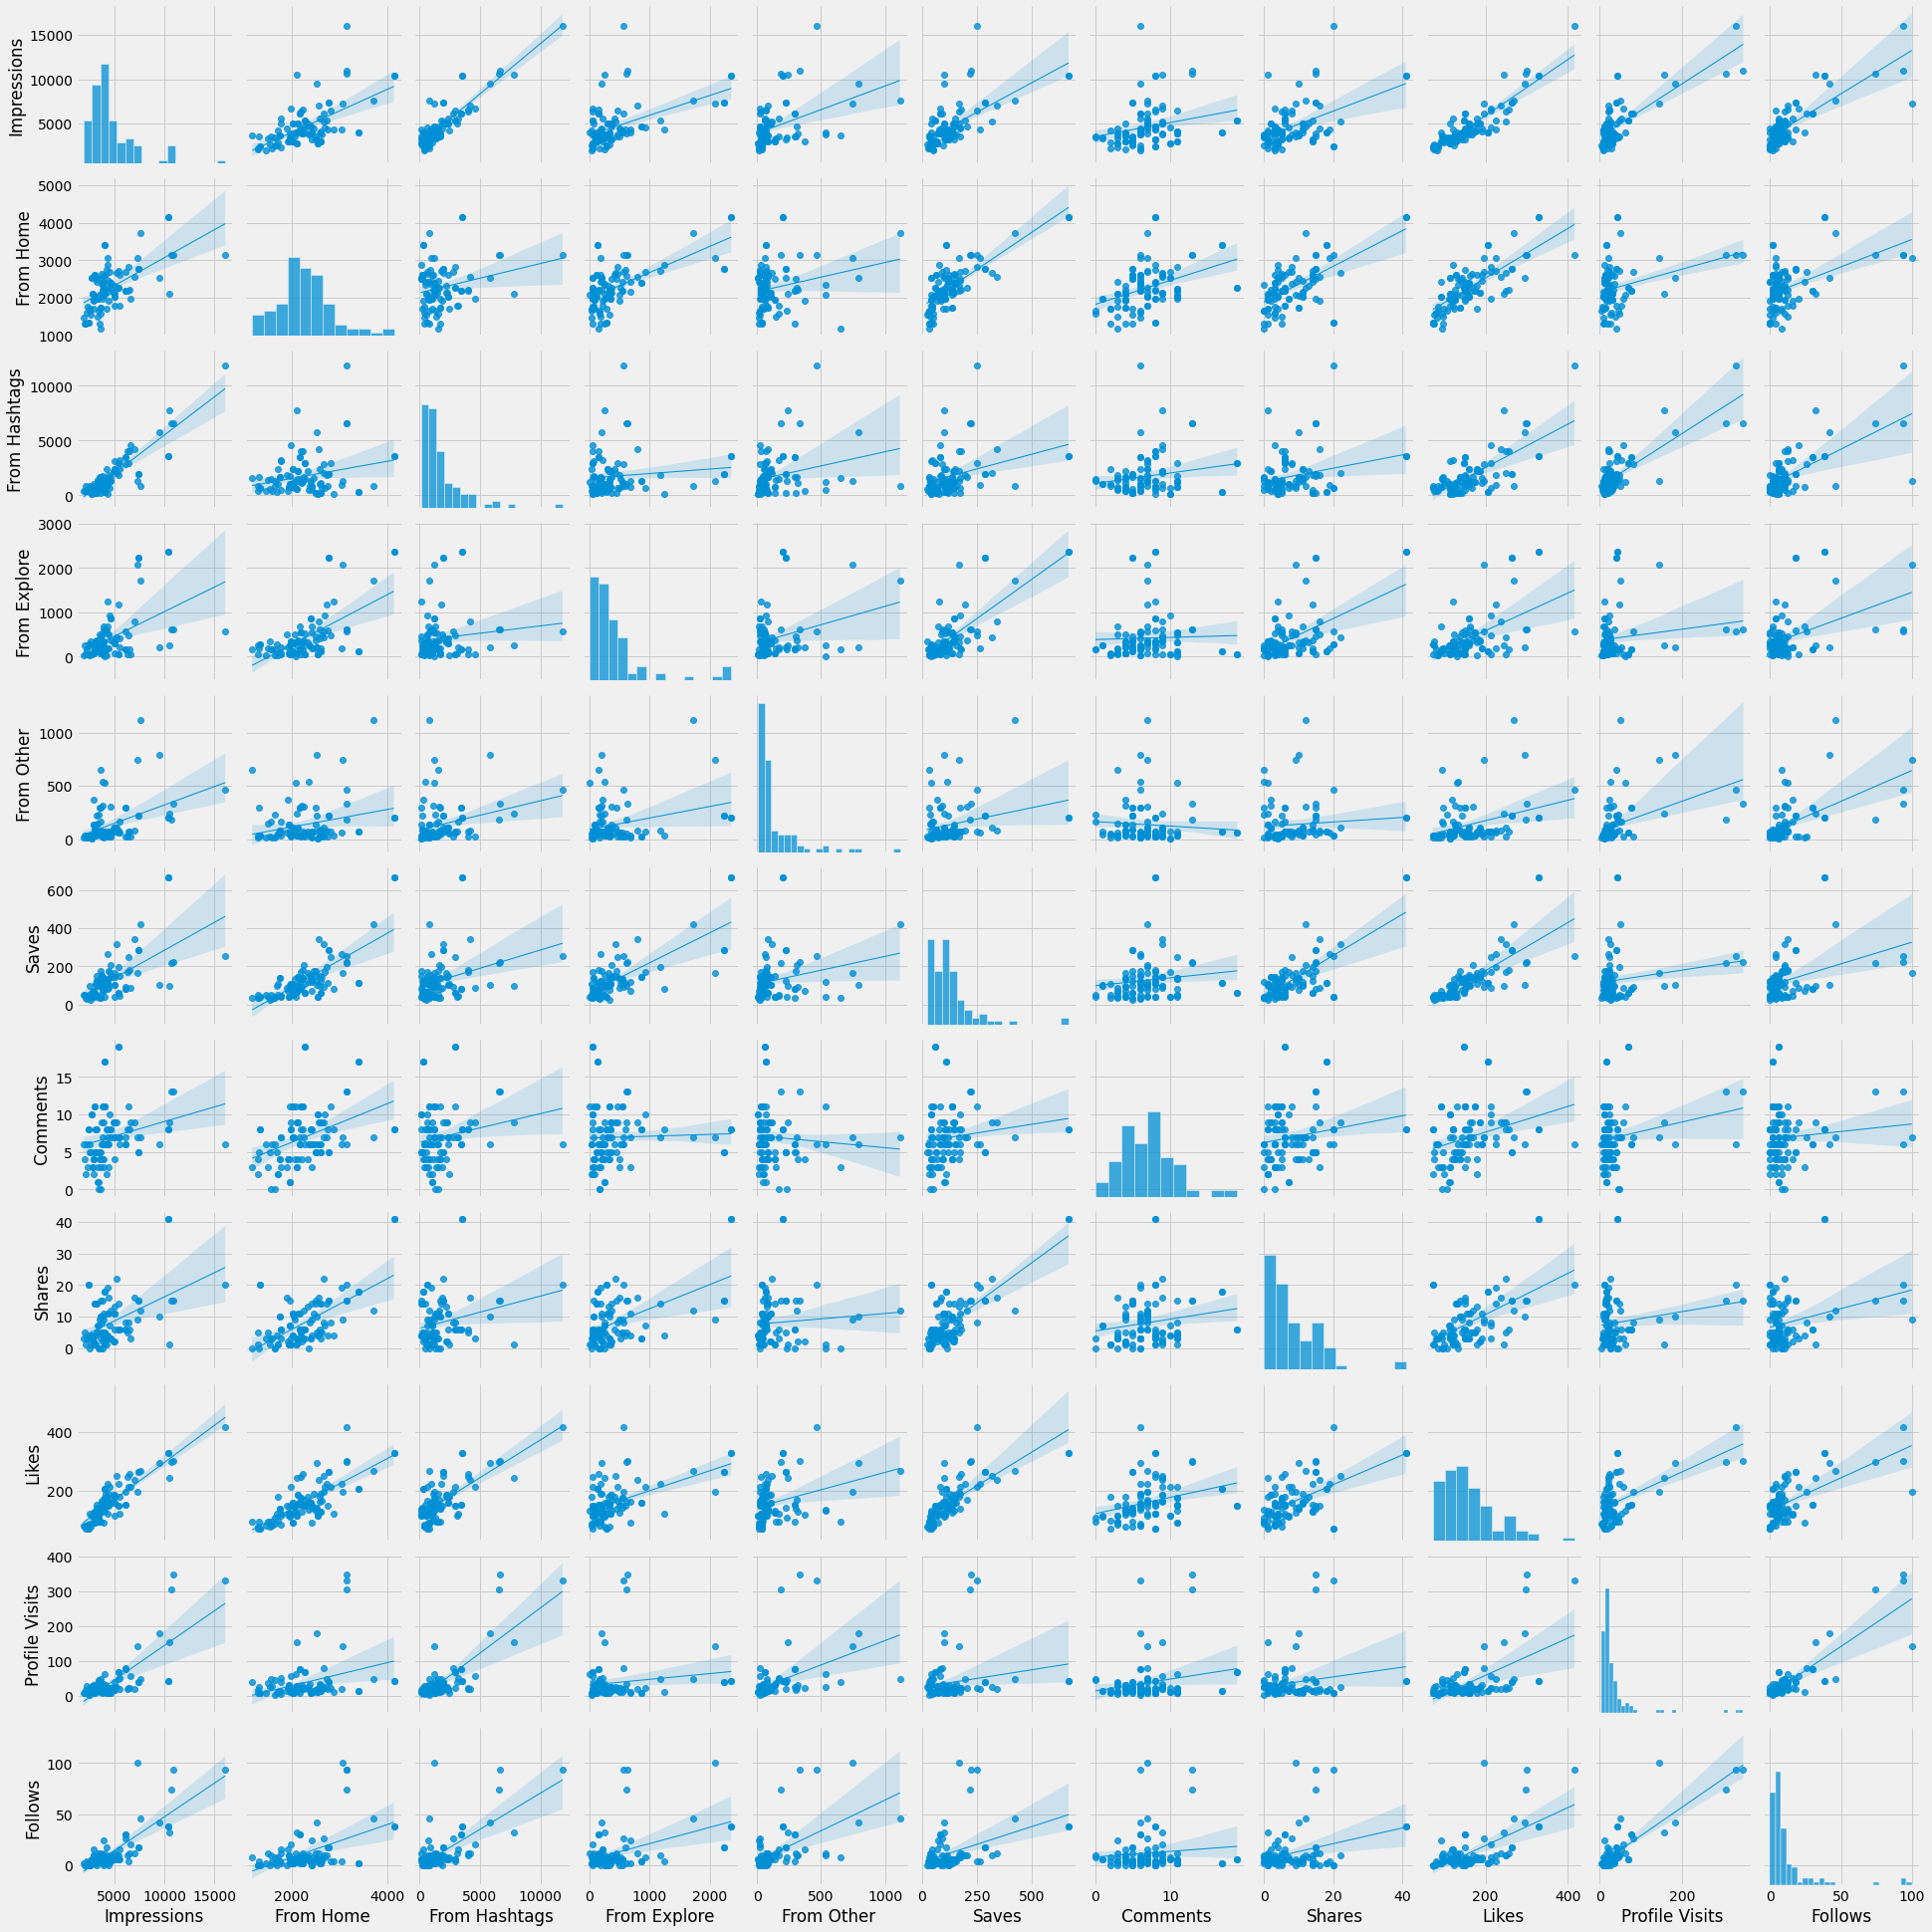

In [13]:
sns.pairplot(data = df, kind = 'reg', plot_kws={'line_kws':{'lw': 1,}})
plt.show()

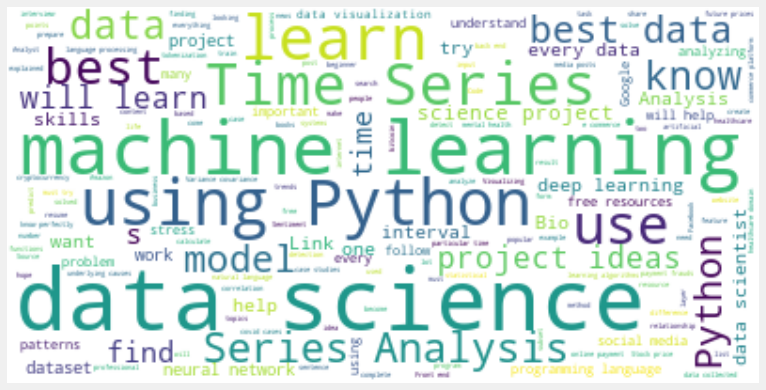

In [14]:
text = " ".join(word for word in df['Caption'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize =(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

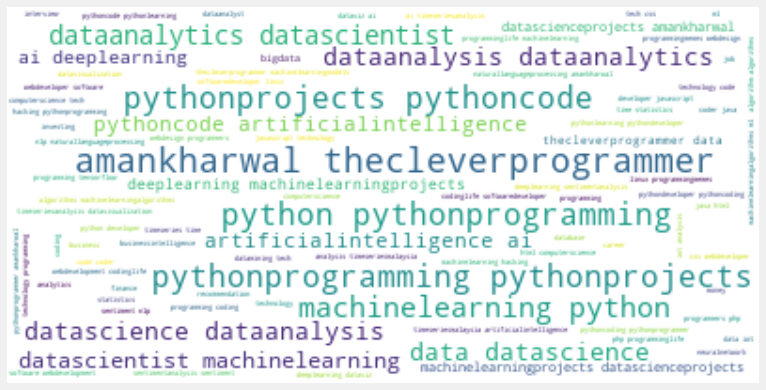

In [15]:
text = " ".join(word for word in df['Hashtags'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
corr = df.corr()
corr

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.603378,0.892682,0.498389,0.429227,0.625600,0.247201,0.476617,0.896277,0.774393,0.804064
From Home,0.603378,1.000000,0.247775,0.627201,0.253017,0.751234,0.404574,0.619734,0.753177,0.318869,0.484809
From Hashtags,0.892682,0.247775,1.000000,0.117056,0.264955,0.321904,0.189838,0.250159,0.715534,0.793107,0.678926
From Explore,0.498389,0.627201,0.117056,1.000000,0.299308,0.748407,0.033685,0.531271,0.537275,0.143380,0.431809
From Other,0.429227,0.253017,0.264955,0.299308,1.000000,0.248961,-0.082457,0.085182,0.336636,0.437586,0.588807
Saves,0.625600,0.751234,0.321904,0.748407,0.248961,1.000000,0.137822,0.744239,0.761749,0.181447,0.396706
Comments,0.247201,0.404574,0.189838,0.033685,-0.082457,0.137822,1.000000,0.182959,0.307451,0.205561,0.104389
Shares,0.476617,0.619734,0.250159,0.531271,0.085182,0.744239,0.182959,1.000000,0.575453,0.174526,0.301200
Likes,0.896277,0.753177,0.715534,0.537275,0.336636,0.761749,0.307451,0.575453,1.000000,0.586680,0.638916
Profile Visits,0.774393,0.318869,0.793107,0.143380,0.437586,0.181447,0.205561,0.174526,0.586680,1.000000,0.872862


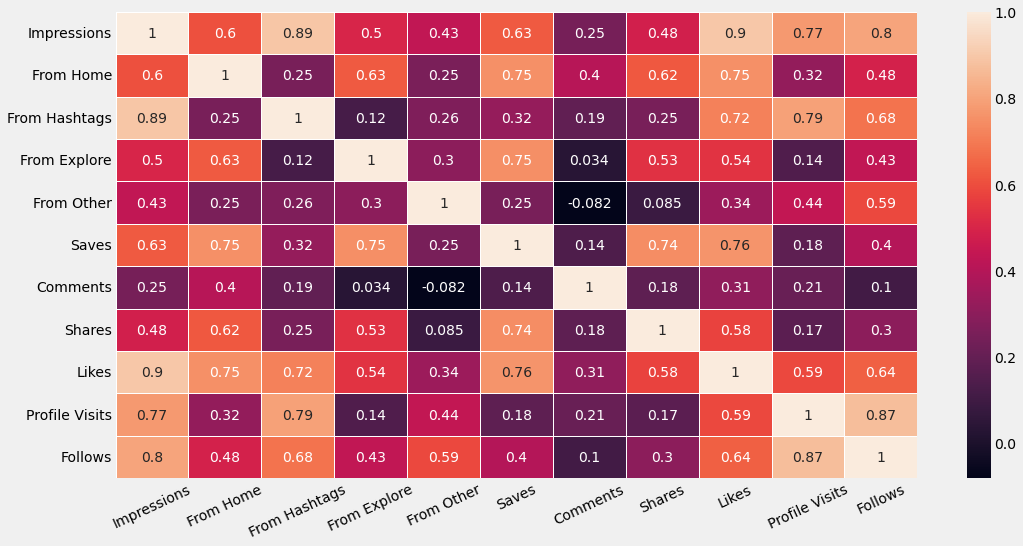

In [17]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, linewidths=.5)
plt.xticks(rotation=25)
plt.show()

In [18]:
X = df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']]
y = df["Impressions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [19]:
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)

PassiveAggressiveRegressor()

In [20]:
model.score(X_test, y_test)

0.9304871500963457

In [21]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
print(f"Prediction: {model.predict(features).item()}")

Prediction: 10466.430598028912
